In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('/home/tomasz/Desktop/fatal-police-shootings-data.csv')
list_of_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
df_states=list_of_states[0]
list_of_abbrevs=pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')
df_abbrevs=list_of_abbrevs[0]

In [3]:
df_abbrevs.rename(columns={'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)':'state_name',
                          'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5':'state'},inplace=True)

In [4]:
abbrevs=df_abbrevs.loc[11:,['state_name','state']]

In [5]:
abbrevs.head()

,state_name,state
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
15,California,CA


In [6]:
df_states.rename(columns={'Census population, April 1, 2020 [1][2]':'population','State':'state_name'},inplace=True)
states=df_states.loc[:,['state_name','population']]
states.sort_values(by='state_name').head()

,state_name,population
23,Alabama,5024279
48,Alaska,733391
54,American Samoa,49710
13,Arizona,7151502
33,Arkansas,3011524


In [7]:
df2=df.copy()

In [8]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:

days=df['date'].dt.day_name()


In [11]:
days_counted={
     'Monday':0,
     'Tuesday':0,
     'Wednesday':0,
     'Thursday':0,
     'Friday':0,
     'Saturday':0,
     'Sunday':0}
for day in days:
    if day=='Monday':
        days_counted[day]+=1
    elif day=='Tuesday':
        days_counted[day]+=1
    elif day=='Wednesday':
        days_counted[day]+=1
    elif day=='Thursday':
        days_counted[day]+=1
    elif day =='Friday':
        days_counted[day]+=1
    elif day =='Saturday':
        days_counted[day]+=1
    else:
        days_counted[day]+=1
    

In [12]:
days.value_counts()

date
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

In [13]:
days_counted

{'Monday': 726,
 'Tuesday': 816,
 'Wednesday': 829,
 'Thursday': 810,
 'Friday': 761,
 'Saturday': 721,
 'Sunday': 753}

In [14]:
df['day_of_week']=df['date'].dt.day_name()

In [15]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


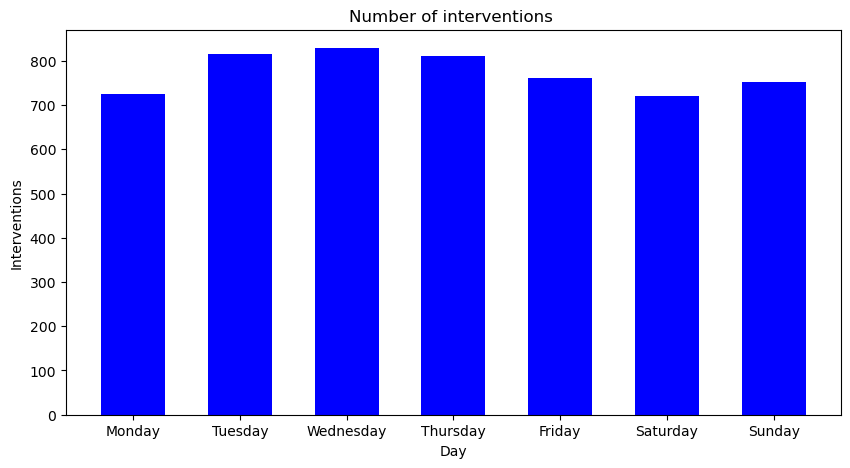

In [16]:

days_counted
day = list(days_counted.keys())
numbers = list(days_counted.values())
  
fig = plt.figure(figsize = (10, 5))
 
#
plt.bar(day, numbers, color ='blue',
        width = 0.6)
 
plt.xlabel("Day")
plt.ylabel("Interventions")
plt.title("Number of interventions ")
plt.show()

In [17]:
states.columns

Index(['state_name', 'population'], dtype='object')

In [18]:
abbrevs.columns

Index(['state_name', 'state'], dtype='object')

In [19]:
states_abbrevs=states.merge(abbrevs)
states_abbrevs.head()

,state_name,population,state
0,California,39538223,CA
1,Texas,29145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [20]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [21]:
df=df.merge(states_abbrevs,on='state')


In [22]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,state_name,population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7705281
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington,7705281
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington,7705281
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington,7705281
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington,7705281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,Tuesday,Vermont,643077
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,Thursday,Rhode Island,1097379
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,Monday,Rhode Island,1097379
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,Thursday,Rhode Island,1097379


In [23]:
df['race'].value_counts()

race
W    2476
B    1298
H     902
A      93
N      78
O      48
Name: count, dtype: int64

In [24]:
df2[(df['race']=='W') & (df['signs_of_mental_illness']== False )].count()[0]

1763

In [25]:
df['race']=df['race'].fillna('missing')

In [26]:
def mental(row):
    if  row=='missing':
        return 'no data'
    else:
        race_num  = df[df['race']==row].count()[0]
        mentally_sick_num = df2[(df['race']==row) & (df['signs_of_mental_illness']== True )].count()[0] 
        return  f'{round((mentally_sick_num *100)/race_num,1)}%'

df['percentage of mental illness in particular race']=df['race'].apply(lambda x: mental(x))

In [27]:
df.sample(50)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,state_name,population,percentage of mental illness in particular race
859,4004,Eric Jay Hames,2018-08-27,shot,knife,34.0,M,W,Redding,CA,True,other,Not fleeing,False,Monday,California,39538223,28.8%
2998,1807,David Klassen,2016-08-18,shot,gun,29.0,M,W,Ruidoso,NM,False,other,Not fleeing,False,Thursday,New Mexico,2117522,28.8%
1390,3873,Logan Simpson,2018-07-22,shot,vehicle,16.0,M,W,Bixby,OK,False,attack,Car,False,Sunday,Oklahoma,3959353,28.8%
2727,4237,Roderick McDaniel,2018-11-20,shot,vehicle,33.0,M,B,Magnolia,AR,False,attack,Not fleeing,False,Tuesday,Arkansas,3011524,14.2%
3122,5013,Brian Quinones,2019-09-07,shot,knife,30.0,M,H,Richfield,MN,True,other,Car,False,Saturday,Minnesota,5706494,17.4%
986,5030,Alvaro Duran Venegas,2019-09-12,shot,piece of wood,35.0,M,H,Santa Clarita,CA,False,attack,Not fleeing,False,Thursday,California,39538223,17.4%
1047,5622,Jennifer Taylor,2020-03-09,shot,gun,29.0,F,W,Dinuba,CA,False,attack,Not fleeing,False,Monday,California,39538223,28.8%
3236,4847,James C. Pinkston,2019-07-05,shot,gun,58.0,M,W,Mountain Grove,MO,False,attack,Not fleeing,False,Friday,Missouri,6154913,28.8%
3602,5418,Djuantez Anthony Mitchell,2019-05-15,shot,vehicle,30.0,M,B,Louisville,KY,False,attack,Car,False,Wednesday,Kentucky,4505836,14.2%
2994,1662,Josh Herrera,2016-06-23,shot,gun,29.0,M,missing,Hanover,NM,False,undetermined,Not fleeing,False,Thursday,New Mexico,2117522,no data


In [28]:
df[df['signs_of_mental_illness']==True]['race'].value_counts()

race
W          713
B          184
H          157
missing    113
A           24
N           14
O           11
Name: count, dtype: int64

## Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje sie rasa oznaczona  - 'W'

In [29]:
states_grp=df.groupby('state_name')
states_grp['population'].value_counts().loc['California']


population
39538223    799
Name: count, dtype: int64

In [30]:
state_population=df[df['state_name']=='California']['population'].unique()[0]

In [31]:
def incidence_rate_calculator(row):
        state_cases=df[df['state_name']==row].count()[0]
        state_population=df[df['state_name']==row]['population'].unique()[0]
        return round((state_cases/state_population) *1000,4)
    

In [32]:
df['cases on 1000 habitants']=df['state_name'].apply(lambda row:incidence_rate_calculator(row))

In [33]:
df.sample(50)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,state_name,population,percentage of mental illness in particular race,cases on 1000 habitants
3917,4561,Latasha Nicole Walton,2019-03-12,shot,vehicle,32.0,F,B,Miami,FL,False,other,Not fleeing,False,Tuesday,Florida,21538187,14.2%,0.0163
3050,5459,Johnny M. Vigil,2019-07-07,shot,gun,43.0,M,missing,Tularosa,NM,False,attack,Not fleeing,False,Sunday,New Mexico,2117522,no data,0.0501
4233,4619,Thomas Verile,2019-04-04,shot,unarmed,37.0,M,W,Kalamazoo,MI,True,other,Not fleeing,False,Thursday,Michigan,10077331,28.8%,0.0077
254,1843,Caleb J. Douglas,2016-09-01,shot,gun,18.0,M,W,Wichita,KS,False,other,Car,True,Thursday,Kansas,2937880,28.8%,0.0170
1091,108,Orlando Jude Lopez,2015-01-25,shot,gun,26.0,M,H,Pueblo,CO,False,attack,Car,False,Sunday,Colorado,5773714,17.4%,0.0338
3976,5325,Juan Rosa,2019-12-26,shot,gun,35.0,M,H,Auburndale,FL,True,attack,Not fleeing,False,Thursday,Florida,21538187,17.4%,0.0163
2260,5040,TK TK,2019-09-15,shot,gun,NaN,M,missing,Katy,TX,False,attack,Foot,False,Sunday,Texas,29145505,no data,0.0165
4221,3836,Steve Ballard,2018-06-29,shot,gun,56.0,M,W,Waterford Township,MI,True,attack,Car,False,Friday,Michigan,10077331,28.8%,0.0077
1540,2205,JR Williams,2017-01-09,shot,unarmed,38.0,M,B,Phoenix,AZ,False,other,Foot,True,Monday,Arizona,7151502,14.2%,0.0355
3142,977,Joseph Tyndall,2015-11-04,shot,gun,30.0,M,W,Springfield,MO,False,attack,Foot,False,Wednesday,Missouri,6154913,28.8%,0.0229


In [34]:
df.reset_index()
df.set_index(['race','signs_of_mental_illness'],inplace=True)
df.sort_index(inplace=True)

In [35]:
df

id                name       date  \
race    signs_of_mental_illness                                        
A       False                    1957   Michael L. Taylor 2016-10-11   
        False                    2666            Tommy Le 2017-06-14   
        False                    4332      Iosia Faletogo 2018-12-31   
        False                    4473      Clayton Joseph 2019-02-19   
        False                    5363       Clando Anitok 2020-01-10   
...                               ...                 ...        ...   
missing True                     2619  Larry Warren Kipps 2017-05-29   
        True                     4076        Tison Dinney 2018-10-07   
        True                     2271          Val Thomas 2017-01-29   
        True                     4331    Matthew Lorenzen 2018-11-30   
        True                     4935        Mark Johnson 2019-08-09   

                                  manner_of_death       armed   age gender  \
race    signs_of_mental_illness                                              
A       False                                shot       knife  44.0      M   
        False                    shot and Tasered         pen  20.0      M   
        False                                shot         gun  36.0      M   
        False                                shot       knife  16.0      M   
        False                    shot and Tasered     unarmed  25.0      M   
...                                           ...         ...   ...    ...   
missing True                                 shot         gun  62.0      M   
        True                                 shot     machete  51.0      M   
        True                                 shot       Taser  53.0      M   
        True                                 shot         gun  19.0      M   
        True                                 shot  toy weapon  62.0      M   

                                          city state threat_level  \
race    signs_of_mental_illness                                     
A       False                          Seattle    WA        other   
        False                           Burien    WA       attack   
        False                          Seattle    WA       attack   
        False                        Vancouver    WA       attack   
        False                          Spokane    WA        other   
...                                        ...   ...          ...   
missing True                      Gerrardstown    WV       attack   
        True                          Honolulu    HI       attack   
        True                           Oakdale    CT       attack   
        True                     New Underwood    SD       attack   
        True                        Montpelier    VT       attack   

                                        flee  body_camera day_of_week  \
race    signs_of_mental_illness                                         
A       False                    Not fleeing        False     Tuesday   
        False                    Not fleeing        False   Wednesday   
        False                           Foot         True      Monday   
        False                    Not fleeing        False     Tuesday   
        False                            Car        False      Friday   
...                                      ...          ...         ...   
missing True                     Not fleeing        False      Monday   
        True                     Not fleeing         True      Sunday   
        True                     Not fleeing        False      Sunday   
        True                             Car        False      Friday   
        True                     Not fleeing        False      Friday   

                                    state_name  population  \
race    signs_of_mental_illness                              
A       False                       Washington     7705281   
        False                       Washington   